In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns # for heatmap

### Read in the data

NOTE: last three rows are blank so we should drop/delete them

In [2]:
data = pd.read_csv("./data/SpotifyData.csv")
df = pd.DataFrame(data)
df = df.iloc[:-3, :] # last 3 rows are all NAs
df.head(10)

title           artist  \
0                  STARSTRUKK (feat. Katy Perry)            3OH!3   
1                    My First Kiss (feat. Ke$ha)            3OH!3   
2                                I Need A Dollar       Aloe Blacc   
3  Airplanes (feat. Hayley Williams of Paramore)            B.o.B   
4              Nothin' on You (feat. Bruno Mars)            B.o.B   
5                     Magic (feat. Rivers Cuomo)            B.o.B   
6                           The Time (Dirty Bit)  Black Eyed Peas   
7                                        Imma Be  Black Eyed Peas   
8                            Talking to the Moon       Bruno Mars   
9                           Just the Way You Are       Bruno Mars   

     top genre  year released       added    bpm  nrgy  dnce   dB  live   val  \
0    dance pop         2009.0  2022‑02‑17  140.0  81.0  61.0 -6.0  23.0  23.0   
1    dance pop         2010.0  2022‑02‑17  138.0  89.0  68.0 -4.0  36.0  83.0   
2     pop soul         2010.0  2022‑02‑17   95.0  48.0  84.0 -7.0   9.0  96.0   
3  atl hip hop         2010.0  2022‑02‑17   93.0  87.0  66.0 -4.0   4.0  38.0   
4  atl hip hop         2010.0  2022‑02‑17  104.0  85.0  69.0 -6.0   9.0  74.0   
5  atl hip hop         2010.0  2022‑02‑17   82.0  93.0  55.0 -4.0  35.0  79.0   
6    dance pop         2010.0  2022‑02‑17  128.0  81.0  82.0 -8.0  60.0  44.0   
7    dance pop         2009.0  2022‑02‑17   92.0  52.0  60.0 -7.0  31.0  41.0   
8    dance pop         2010.0  2022‑02‑17  146.0  59.0  50.0 -5.0  11.0   8.0   
9    dance pop         2010.0  2022‑02‑17  109.0  84.0  64.0 -5.0   6.0  42.0   

     dur  acous  spch   pop  top year artist type  
0  203.0    0.0   6.0  70.0    2010.0         Duo  
1  192.0    1.0   8.0  68.0    2010.0         Duo  
2  243.0   20.0   3.0  72.0    2010.0        Solo  
3  180.0   11.0  12.0  80.0    2010.0        Solo  
4  268.0   39.0   5.0  79.0    2010.0        Solo  
5  196.0    1.0  34.0  71.0    2010.0        Solo  
6  308.0    7.0   7.0  75.0    2010.0  Band/Group  
7  258.0   18.0  37.0  71.0    2010.0  Band/Group  
8  218.0   51.0   3.0  87.0    2010.0        Solo  
9  221.0    1.0   4.0  86.0    2010.0        Solo

### Looking at "pop" (potential response variable)

In [3]:
print(df["pop"].max())
print(df["pop"].min())

95.0
35.0


In [4]:
df[df["pop"] == 95.0]

title             artist                top genre  \
392  Sweater Weather  The Neighbourhood  modern alternative rock   

     year released       added    bpm  nrgy  dnce   dB  live   val    dur  \
392         2013.0  2020‑06‑11  124.0  81.0  61.0 -3.0  10.0  40.0  240.0   

     acous  spch   pop  top year artist type  
392    5.0   3.0  95.0    2013.0  Band/Group

In [5]:
df[df["pop"] == 35.0]

title           artist top genre  year released       added  \
182  Read All About It  Professor Green     grime         2021.0  2020‑06‑16   

       bpm  nrgy  dnce   dB  live   val    dur  acous  spch   pop  top year  \
182  101.0  75.0  66.0 -6.0  22.0  45.0  236.0   34.0   4.0  35.0    2011.0   

    artist type  
182        Solo

### Most common "Top Genre" values

We will look at the top 10 most common `top genre` values and the number of unique genres:

In [6]:
df["top genre"].value_counts()[0:10]

dance pop            361
pop                   57
atl hip hop           39
art pop               37
hip hop               21
boy band              21
canadian hip hop      18
edm                   17
folk-pop              15
conscious hip hop     14
Name: top genre, dtype: int64

In [7]:
len(df["top genre"].unique()) # number of unique genres

132

Dance pop is the most common by far compared to the other genres. There are also 132 unique genres so many likely have only a handful or fewer songs. This suggests we will need to consolidate genres into broader categories since the labels are so granular.

### Correlation b/w variables

To find highly correlated variables, we create a heatmap:

<AxesSubplot:>

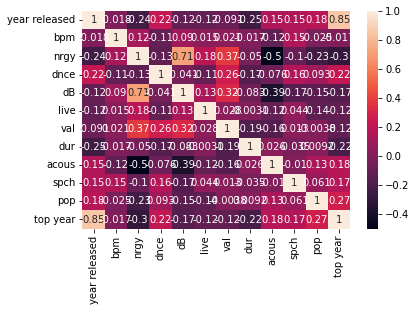

In [8]:
sns.heatmap(df.corr(), annot=True)

`bpm` and `dB` look to be relatively correlated. The scatterplot between these two is below:

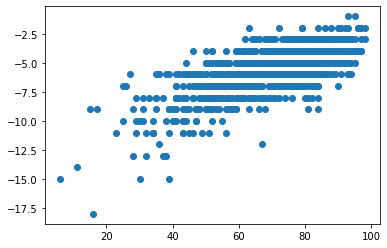

In [9]:
plt.pyplot.scatter(df["nrgy"], df["dB"])

### `top year` vs. some feature

Potentially can be used to see if some values of song features are more common in certain years/time frames

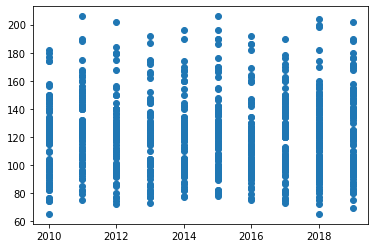

In [11]:
plt.pyplot.scatter(df["top year"], df["bpm"])

## PRINCIPAL COMPONENT ANALYSIS

#### Standardize Data

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ["bpm", "nrgy", "live", "val", "dur", "acous", "spch"]
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,["top year"]].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf

In [ ]:
fin_df = pd.concat([principalDf, df[["top year"]]], axis = 1)
fin_df

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [2010.0, 2013.0, 2019.0]
colors = ["r", "g", "b"]
for target, color in zip(targets,colors):
    indicesToKeep = fin_df["top year"] == target
    ax.scatter(fin_df.loc[indicesToKeep, 'principal component 1']
               , fin_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()